In [1]:
import pandas as pd
import requests as r
import json
import os
import tweepy
import time

# A)Gather :
* We gather from three types of resources in three different fomats as follows.

1) df1:
       * Twitter data 
       * Format - CSV file
       * Source - Manual Download of dataset

In [2]:
df1 = pd.read_csv('twitter-archive-enhanced.csv')

2) df2:
       * Image predictions 
       * Format - TSV file
       * Source - Requesting the resource URL 

In [3]:
response = r.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv') 
with open(os.path.join('image_predictions.tsv'), mode = 'wb') as file:
    file.write(response.content)
df2 = pd.read_csv('image_predictions.tsv',sep ='\t')

3) df3:
       * Twiiter additional data 
       * Format - json file
       * Source - Requesting from twitter API 

In [4]:
df3 = pd.DataFrame(columns=['tweet_id', 'retweet_count', 'favorite_count'])
with open('tweet-json.txt') as data_file:
    for tweet_number in data_file:
        tweet = json.loads(tweet_number)
        tweet_id = tweet['id_str']
        retweet_count = tweet['retweet_count']
        favorite_count = tweet['favorite_count']
        df3 = df3.append(pd.DataFrame([[tweet_id, retweet_count, favorite_count]],columns=['tweet_id', 'retweet_count', 'favorite_count']))
        df3 = df3.reset_index(drop=True)

# B) ASSESS :
* We assess the data gathered to observe and find a minimum of 8 cleanliness(dirty data) issues and 2 tidiness(messy data) issues.

In [5]:
df1.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


In [6]:
df2.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


In [7]:
df3.head(2)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819


In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [9]:
df1.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

#### Observation : 
* High null values nd improper datatypes in columns like 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_timestamp'.
* 'expanded_urls' have null values. (Image source URL is missing)

In [10]:
print("Null values in doggo is {}".format(df1.doggo.isnull().sum()))
df1.doggo.value_counts()

Null values in doggo is 0


None     2259
doggo      97
Name: doggo, dtype: int64

In [11]:
print("Null values in floofer is {}".format(df1.floofer.isnull().sum()))
df1.floofer.value_counts()

Null values in floofer is 0


None       2346
floofer      10
Name: floofer, dtype: int64

In [12]:
print("Null values in pupper is {}".format(df1.pupper.isnull().sum()))
df1.pupper.value_counts()

Null values in pupper is 0


None      2099
pupper     257
Name: pupper, dtype: int64

In [13]:
print("Null values in puppo is {}".format(df1.puppo.isnull().sum()))
df1.puppo.value_counts()

Null values in puppo is 0


None     2326
puppo      30
Name: puppo, dtype: int64

#### Observation :
* Dog stages have null values represemted with a string "None".(Dirtiness)
* Dog stages are represented in four columns when it can better represented in one 'dog stage' column.(Messiness)

In [14]:
df1.dtypes

tweet_id                        int64
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                      object
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator                int64
rating_denominator              int64
name                           object
doggo                          object
floofer                        object
pupper                         object
puppo                          object
dtype: object

#### Observation :
* Datatype of 'timestamp' and 'retweeted_status_timestamp' is object instead of datetime64. 
* Datatype of 'tweet_id' is integer instead of an object(string).

In [15]:
df1.expanded_urls.isnull().sum() # No. of null values in expanded urls

59

#### Observation :
* 'expanded_urls' have null values. (Image source URL is missing)

In [16]:
df1.retweeted_status_id.notnull().sum() #Number of retweeted status (Retweets are duplicates of the same dog but has a different tweet ID)

181

#### Observation :
* Retweets are present which are supposed to be excluded.

In [17]:
df1.source.unique()  #Unique values of sources

array([ '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'], dtype=object)

#### Observation :
* Source is has html attribute like the tags <a, href> unnecessary complicated things.

In [18]:
df1.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [19]:
improper_denom_count = len(df1.query('rating_denominator != 10'))
print("There are",improper_denom_count,"tweet ratings without a 10 point rating scale.")
df1.query('rating_denominator != 10').sample(1)

There are 23 tweet ratings without a 10 point rating scale.


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1274,709198395643068416,NaN,NaN,2016-03-14 02:04:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...","From left to right:\nCletus, Jerome, Alejandro...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/709198395...,45,50,None,None,None,None,None


#### Observation :
* Unstardadized Rating scores. For instance having denominators with zero is absurdly wrong.
* Note : The numerator might be sometimes greater than denminator but that's because "they're good dogs Brent." So we don't consider it to be a dirty one.

In [20]:
df2.sample(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
961,705898680587526145,https://pbs.twimg.com/media/CcvbGj5W8AARjB6.jpg,1,collie,0.808276,True,Border_collie,0.059437,True,groenendael,0.026720,True
1606,800459316964663297,https://pbs.twimg.com/media/CxvNfrhWQAA2hKM.jpg,1,teddy,0.311928,False,ice_bear,0.184657,False,Christmas_stocking,0.173229,False


#### Observation :
* Multiple breed name classification with some False classifications too.

## Assessment Summary
* The assesment was conducted visually to give a starting insights and the above code assess the issues programmatically to make observations.

#### Note : 

* There might be many assesments which could have been made, but here are the top issues that need to be cleaned in the future cleaning steps to yield better results.

## Cleanliness :
 
1) High null values in columns like 'in_reply_to_status_id', 'in_reply_to_user_id','retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'.

2) 'expanded_urls' have null values. (Image source URL is missing)

3) Dog stages have null values represemted with a string "None".

4) Datatype of 'timestamp' and 'retweeted_status_timestamp' is object instead of datetime64. 

5) Datatype of 'tweet_id' is integer instead of an object(string) in df1,df2.

6) Retweets are present which are supposed to be excluded.

7) Source is has html attribute like the tags <a, href> complicating things. 

8) Unstardadized Rating scores. For instance having denominators as zero is absurdly wrong.

## Tidiness :
1) Having 3 dataframes df1,df2 and df3 instead of a single dataset

2) Dog stages are represented in four columns when it can better represented in one 'dog stage' column.

3) Having multiple non-necessary columns

# C)Clean :
* We clean the issues assessed in the gathered data to make a master data_set usable for visualisation

In [21]:
#Create a copy of the 3 dataframes
df1c = df1.copy()
df2c = df2.copy()
df3c = df3.copy()

### Define :
* High null values in columns like 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id','retweeted_status_user_id,'retweeted_status_timestamp' is treated as follows :
    * Drop 'in_reply_to_status_id' and 'in_reply_to_user_id' columns(Since they're not required for the analysis phase)
    * Fill in the null values of 'retweeted_status_id', retweeted_status_user_id & 'retweeted_status_timestamp' with zeros 
    * Note : Anyways retwweted columns are going to be dropped later once we exclude the retweets.

### Code :

In [22]:
df1c.drop(['in_reply_to_status_id','in_reply_to_user_id'],axis =1,inplace = True)
df1c.retweeted_status_id.fillna(0.0,inplace = True)
df1c.retweeted_status_user_id.fillna(0.0,inplace = True)
df1c.retweeted_status_timestamp.fillna(0,inplace = True)

### Test :

In [23]:
df1c.isnull().sum()

tweet_id                       0
timestamp                      0
source                         0
text                           0
retweeted_status_id            0
retweeted_status_user_id       0
retweeted_status_timestamp     0
expanded_urls                 59
rating_numerator               0
rating_denominator             0
name                           0
doggo                          0
floofer                        0
pupper                         0
puppo                          0
dtype: int64

### Define :
* 'expanded_urls' have null values need to be dropped as Image source URL is missing and is not feasible to find. 

### Code :

In [24]:
df1c.dropna(inplace = True)

### Test :

In [25]:
df1c.isnull().sum() # No more Null values

tweet_id                      0
timestamp                     0
source                        0
text                          0
retweeted_status_id           0
retweeted_status_user_id      0
retweeted_status_timestamp    0
expanded_urls                 0
rating_numerator              0
rating_denominator            0
name                          0
doggo                         0
floofer                       0
pupper                        0
puppo                         0
dtype: int64

### Define :
* Replace the string 'None' of 'doggo', 'floofer', 'pupper', 'puppo' (dog stages) with empty strings.
* Reason : This helps in performing operations in the rows easily.

### Code :

In [26]:
df1c.doggo.replace('None','',inplace = True)
df1c.floofer.replace('None','',inplace = True)
df1c.pupper.replace('None','',inplace = True)
df1c.puppo.replace('None','',inplace = True)

### Test :

In [27]:
print('Doggo unique values   : {}'.format(df1c.doggo.unique()))
print('Floofer unique values : {}'.format(df1c.floofer.unique()))
print('Pupper unique values  : {}'.format(df1c.pupper.unique()))
print('Puppo unique values   : {}'.format(df1c.puppo.unique()))

Doggo unique values   : ['' 'doggo']
Floofer unique values : ['' 'floofer']
Pupper unique values  : ['' 'pupper']
Puppo unique values   : ['' 'puppo']


### Define :
* Convert the datatype of 'timestamp' and 'retweeted_status_timestamp' to datetime64 instead of object. 

### Code :

In [28]:
df1c.timestamp = pd.to_datetime(df1c.timestamp)
df1c.retweeted_status_timestamp = pd.to_datetime(df1c.retweeted_status_timestamp)

### Test :

In [29]:
df1c.dtypes

tweet_id                               int64
timestamp                     datetime64[ns]
source                                object
text                                  object
retweeted_status_id                  float64
retweeted_status_user_id             float64
retweeted_status_timestamp    datetime64[ns]
expanded_urls                         object
rating_numerator                       int64
rating_denominator                     int64
name                                  object
doggo                                 object
floofer                               object
pupper                                object
puppo                                 object
dtype: object

### Define :
* Convert the datatype of 'tweet_id' to an object(string) instead of an integer because 'tweet_id' is a nominal data


### Code :

In [30]:
df1c.tweet_id = df1c.tweet_id.astype(str)
df2c.tweet_id = df2c.tweet_id.astype(str)

### Test :

In [31]:
df1c.dtypes

tweet_id                              object
timestamp                     datetime64[ns]
source                                object
text                                  object
retweeted_status_id                  float64
retweeted_status_user_id             float64
retweeted_status_timestamp    datetime64[ns]
expanded_urls                         object
rating_numerator                       int64
rating_denominator                     int64
name                                  object
doggo                                 object
floofer                               object
pupper                                object
puppo                                 object
dtype: object

In [32]:
df2c.dtypes

tweet_id     object
jpg_url      object
img_num       int64
p1           object
p1_conf     float64
p1_dog         bool
p2           object
p2_conf     float64
p2_dog         bool
p3           object
p3_conf     float64
p3_dog         bool
dtype: object

### Define:
* Exclude Retweets to only have original tweet threads.

### Code 

In [33]:
df1c = df1c[df1c.retweeted_status_id == 0.0] # We don't convert the nominal retweet id's to object as we're going to drop them soon

### Test

In [34]:
df1c.retweeted_status_id.unique()

array([ 0.])

### Define:
* Remove the html tags from the source. 

### Code 

In [35]:
df1c.source = df1c.source.str[8:-4]

### Test

In [36]:
df1c.source.unique()

array(['"http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone',
       '"http://twitter.com" rel="nofollow">Twitter Web Client',
       '"http://vine.co" rel="nofollow">Vine - Make a Scene',
       '"https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck'], dtype=object)

### Define:

* Standardize ratings at a 10 point scale.

### Code 

In [37]:
#Converting to 10 point scale
df1c.rating_numerator = (df1c.rating_numerator/df1c.rating_denominator) * 10
df1c.rating_denominator = 10
#We can normalize the numerators greter than 10 with the max of 10 but we're not doing it as "they're good dogs Brent."
#df[(df1c.rating_numerator/df1c.rating_denominator) > 10].df1c.rating_numerator = 10 

### Test

In [38]:
(df1c.rating_denominator != 10).sum()

0

### Define:
* Represent the four columns 'doggo', 'floofer', 'pupper', 'puppo' in one 'dog_stage' column.

### Code 

In [39]:
df1c['dog_stage'] = df1c.doggo + df1c.floofer + df1c.pupper + df1c.puppo
df1c.loc[df1c['dog_stage'] == 'doggopuppo', 'dog_stage']  = 'doggo, puppo'
df1c.loc[df1c['dog_stage'] == 'doggofloofer','dog_stage'] = 'doggo, floofer'
df1c.loc[df1c['dog_stage'] == 'doggopupper','dog_stage']  = 'doggo, pupper'
df1c.dog_stage.replace('', 'Stage not known yet', inplace = True)
df1c.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis = 1, inplace = True)

### Test

In [40]:
print('Dog stage unique values : \n')
print(df1c.dog_stage.unique(),'\n')

Dog stage unique values : 

['Stage not known yet' 'doggo' 'puppo' 'pupper' 'floofer' 'doggo, puppo'
 'doggo, floofer' 'doggo, pupper'] 



In [41]:
df1c.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'retweeted_status_id',
       'retweeted_status_user_id', 'retweeted_status_timestamp',
       'expanded_urls', 'rating_numerator', 'rating_denominator', 'name',
       'dog_stage'],
      dtype='object')

### Define:
* Make a single master dataset from the 3 dataframes df1c,df2c and df3c.

### Code 

In [42]:
df3c.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [43]:
tempdf = df1c.merge(df2c,on = 'tweet_id',how = 'inner').merge(df3c,on = 'tweet_id',how = 'inner')

### Test

In [44]:
tempdf.head(2)

,tweet_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56,"""http://twitter.com/download/iphone"" rel=""nofo...",This is Phineas. He's a mystical boy. Only eve...,0.0,0.0,1970-01-01,https://twitter.com/dog_rates/status/892420643...,13.0,10,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,8853,39467
1,892177421306343426,2017-08-01 00:17:27,"""http://twitter.com/download/iphone"" rel=""nofo...",This is Tilly. She's just checking pup on you....,0.0,0.0,1970-01-01,https://twitter.com/dog_rates/status/892177421...,13.0,10,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,6514,33819


### Define:
* Remove the non-necessary columns to make it precisely usable master-dataset

### Code 

In [45]:
#Retweets are already excluded so they're columns indicate nothing to infer
masterdf = tempdf.drop(['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'],axis = 1)

### Test

In [46]:
masterdf.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'dog_stage',
       'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'retweet_count', 'favorite_count'],
      dtype='object')

In [47]:
masterdf.to_csv('twitter_archive_master.csv')

# D)Insights and Visualisation :

In [48]:
df = pd.read_csv('twitter_archive_master.csv')

### Insight 1 :

In [49]:
df.retweet_count.describe()

count     1994.000000
mean      2766.753260
std       4674.698447
min         16.000000
25%        624.750000
50%       1359.500000
75%       3220.000000
max      79515.000000
Name: retweet_count, dtype: float64

* The maximum number of Retweets is 79515
* Most of the retweet count is between the range 624 to 3220.
* Average number of retweets is approximately 2767

### Insight 2 :

In [50]:
df.dog_stage.value_counts()

Stage not known yet    1688
pupper                  203
doggo                    63
puppo                    22
doggo, pupper             9
floofer                   7
doggo, puppo              1
doggo, floofer            1
Name: dog_stage, dtype: int64

* Most of dog stages haven't been identified yet or there is a lack of data.

### Insight 3 :

In [51]:
df.source.unique()

array(['"http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone',
       '"http://twitter.com" rel="nofollow">Twitter Web Client',
       '"https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck'], dtype=object)

* The above mentioned are the three unique sources of images(Iphone,Web and Tweetdeck)

### Insight 4 :

In [52]:
h1 = df.query('rating_numerator >= 10').tweet_id.count()
h2 = df.query('rating_numerator < 10').tweet_id.count()
h1>h2

True

* There are more highly-rated dogs than the lower rated ones.

### Visualisation 1 :
#### Note : 
* This piechart visualisation is based on the standardised rating scores which we cleaned earlier. 

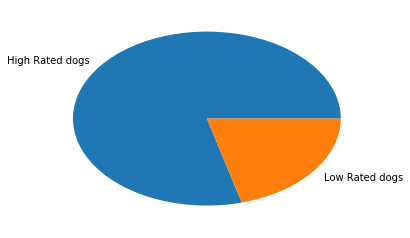

In [53]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.pie([h1,h2], labels = ['High Rated dogs','Low Rated dogs']);

## Sites and References :
* http://docs.tweepy.org/en/v3.2.0/api.html#API
* https://stackabuse.com/reading-and-writing-json-to-a-file-in-python/
* https://stackoverflow.com/questions/7370801/measure-time-elapsed-in-python
* https://stackoverflow.com/questions/28384588/twitter-api-get-tweets-with-specific-id
* https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html